# **Obesity Level Estimation based on Machine Learning Methods and Artificial Neural Networks**

# **Import nessary library**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **Read The Dataset**

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
# first five row of data
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
# lost five row of data
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

# **Exploratory Data Analysis**

In [5]:
# shape of the data
df.shape

(2111, 17)

In [6]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# first five row of data
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [8]:
# lost five row of data
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

In [9]:
# columns of data
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
# data types of column
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [11]:
# take the numaric column of data
num_col = df.select_dtypes('number')

In [12]:
# corilation of numaric column
num_col.corr()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Height'),
  Text(2.5, 0, 'Weight'),
  Text(3.5, 0, 'FCVC'),
  Text(4.5, 0, 'NCP'),
  Text(5.5, 0, 'CH2O'),
  Text(6.5, 0, 'FAF'),
  Text(7.5, 0, 'TUE')])

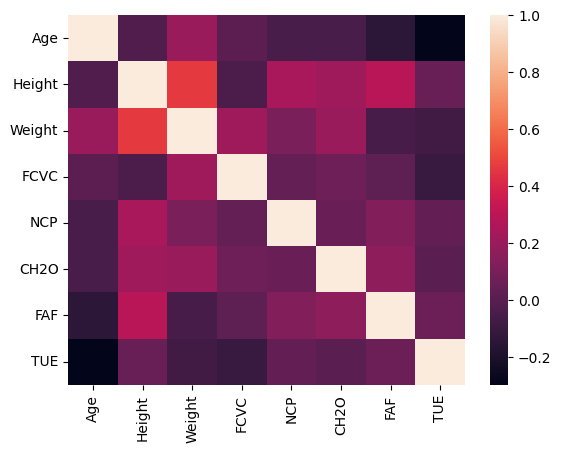

In [13]:
# heatmap of corilation data
sns.heatmap(num_col.corr())
plt.xticks(rotation=90)

In [14]:
# check the duplicate values
df.duplicated().T

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [15]:
# Check The null values on dataset
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


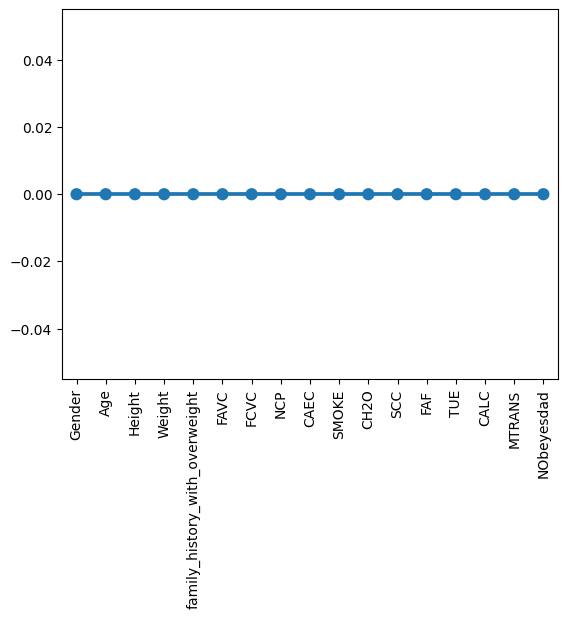

In [16]:
# Assuming df is your DataFrame
sns.pointplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=90)
plt.show()

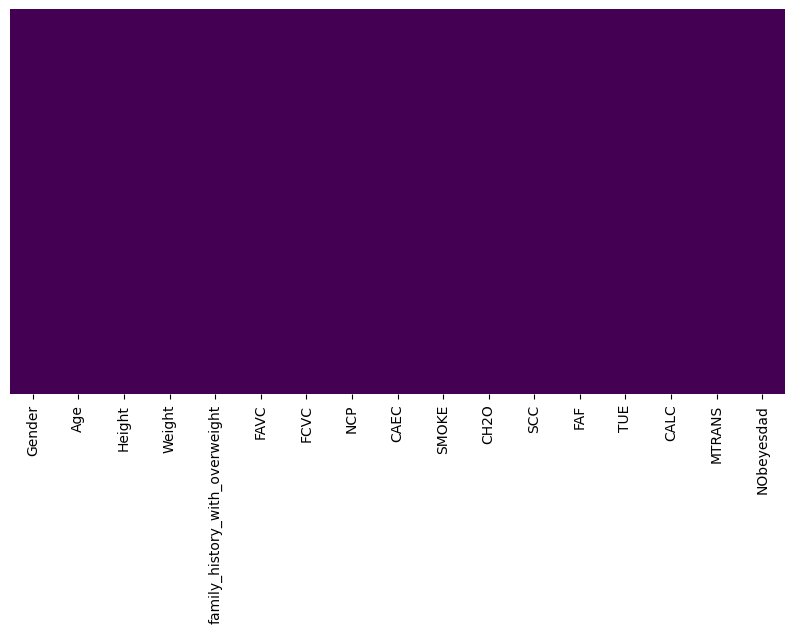

In [17]:
# plot the line plot to show the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [18]:
# checking the unique values of the dataset
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [19]:
# Target column value counts
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


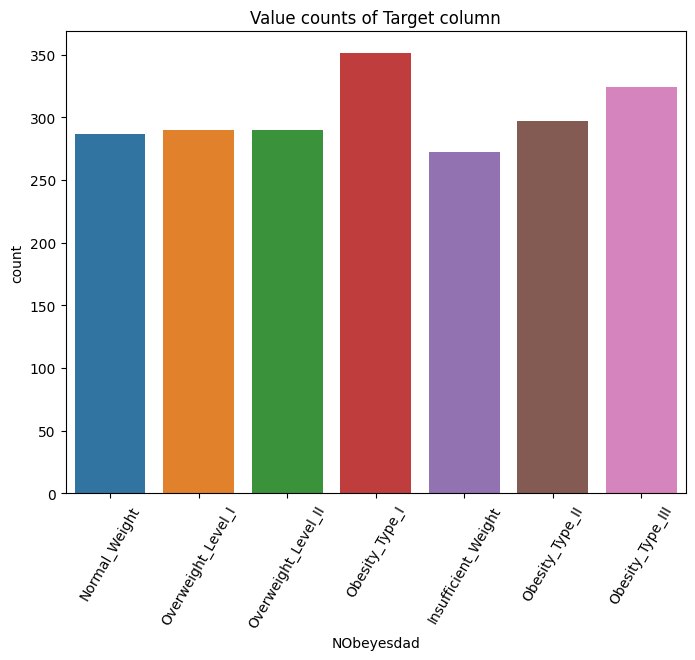

In [20]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.title('Value counts of Target column')
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=60)
plt.show()

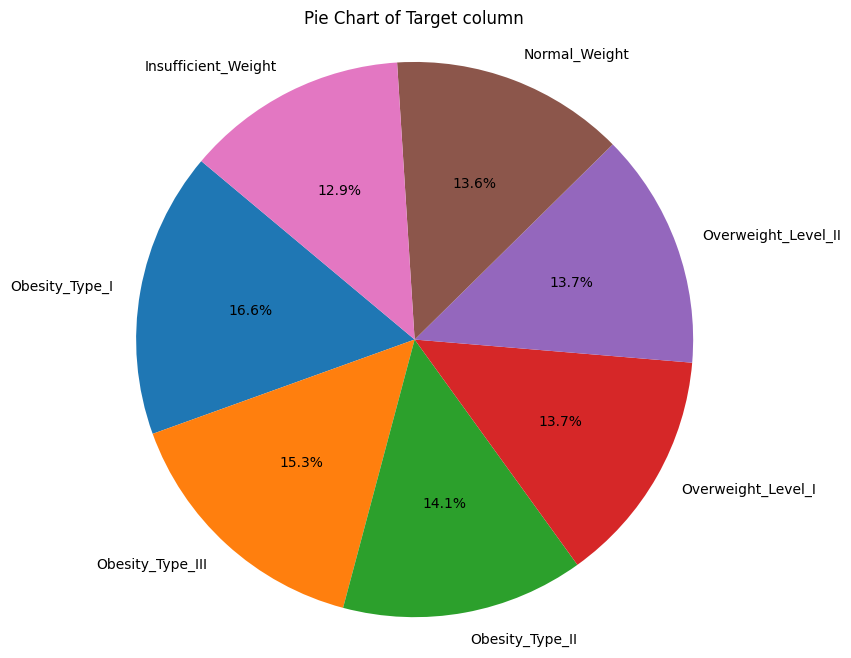

In [21]:
# Assuming 'df' is DataFrame and 'NObeyesdad' is the column you want to visualize
labels = df['NObeyesdad'].value_counts().index
sizes = df['NObeyesdad'].value_counts().values

plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.title('Pie Chart of Target column')

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\0630\AppData\Local\Temp\ipykernel_4736\2890797148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

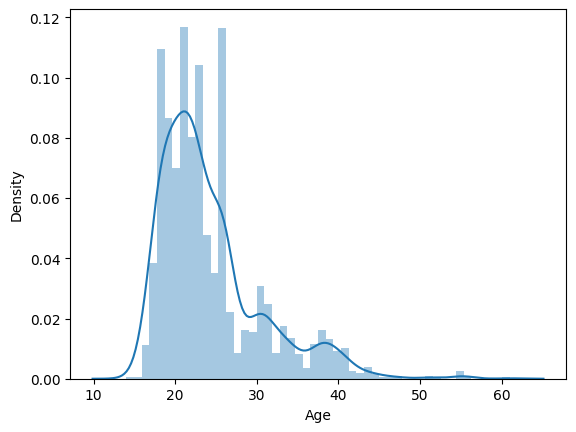

C:\Users\0630\AppData\Local\Temp\ipykernel_4736\2890797148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

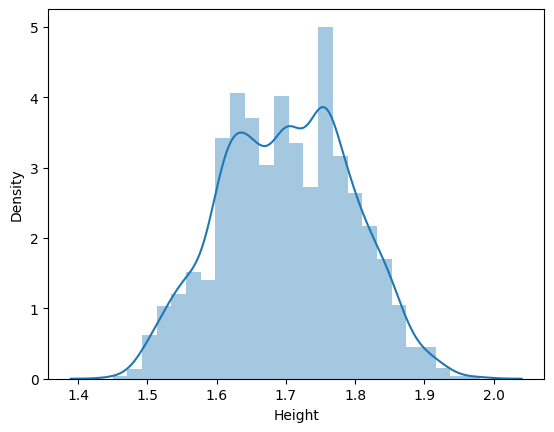

C:\Users\0630\AppData\Local\Temp\ipykernel_4736\2890797148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

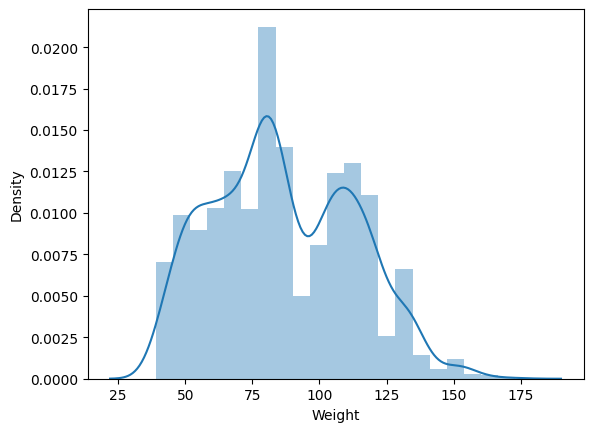

C:\Users\0630\AppData\Local\Temp\ipykernel_4736\2890797148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

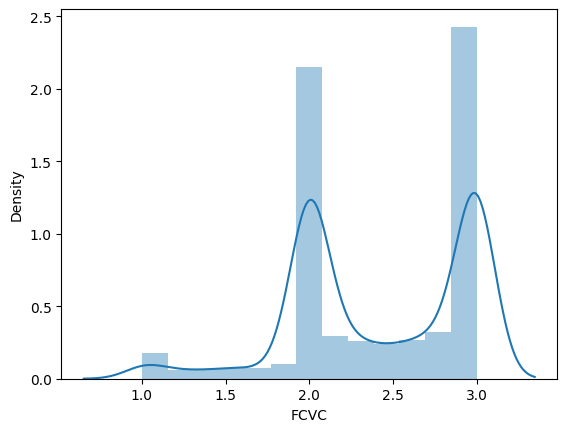

C:\Users\0630\AppData\Local\Temp\ipykernel_4736\2890797148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

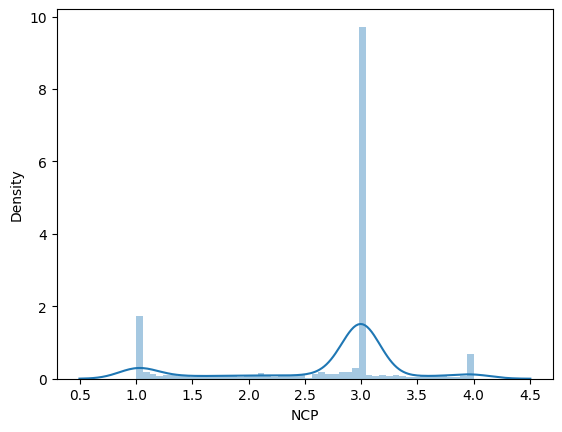

In [22]:
import numpy as np
# write a for loop to print the density plot for each numerical column
for i in df.select_dtypes(include=np.number).columns[:5]:
    sns.distplot(df[i])
    plt.show()

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

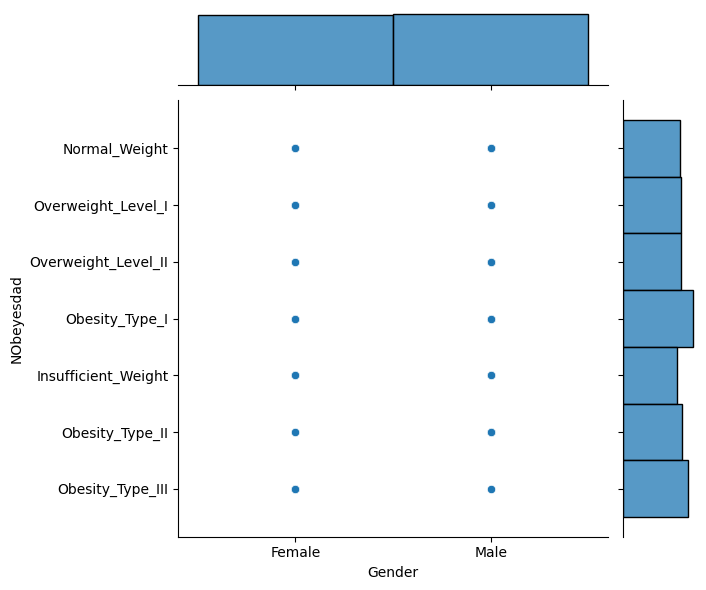

In [23]:
# joint plot for the Gender and NObeyesdad
sns.jointplot(x='Gender',y='NObeyesdad',data=df)

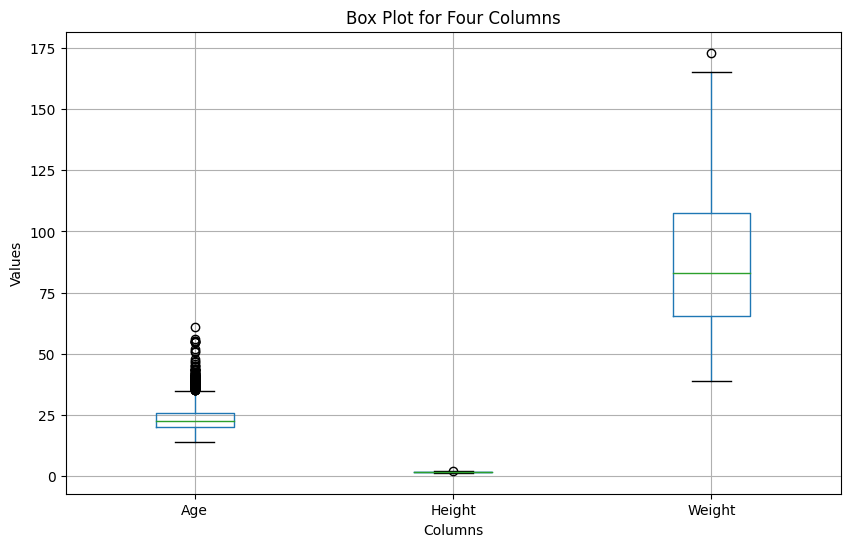

In [24]:
# ploting the box plot for the no_of_trainings,  age,  previous_year_rating, length_of_service and avg_training_score
# Assuming you have a DataFrame called 'data' with the four columns to plot
# next 5 Column
col =  df.columns
columns_to_plot = col[0:5]

# Subset the DataFrame with the selected columns
subset_data = df[columns_to_plot]

# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
subset_data.boxplot()

# Add title and labels
plt.title('Box Plot for Four Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

In [25]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

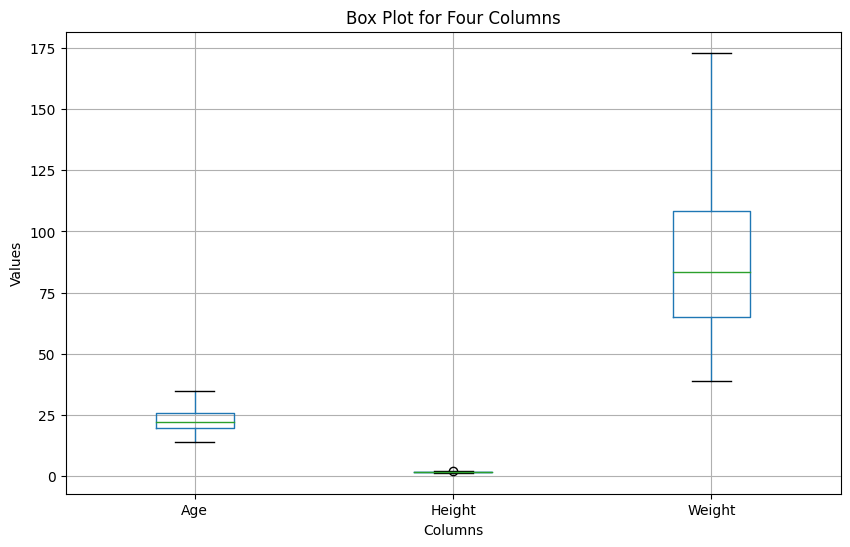

In [26]:
# ploting the box plot for the no_of_trainings,  age,  previous_year_rating, length_of_service and avg_training_score
# Assuming you have a DataFrame called 'data' with the four columns to plot
# next 5 Column
col =  df.columns
columns_to_plot = col[0:5]

# Subset the DataFrame with the selected columns
subset_data = df[columns_to_plot]

# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
subset_data.boxplot()

# Add title and labels
plt.title('Box Plot for Four Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

__________________________________________________
Height
__________________________________________________


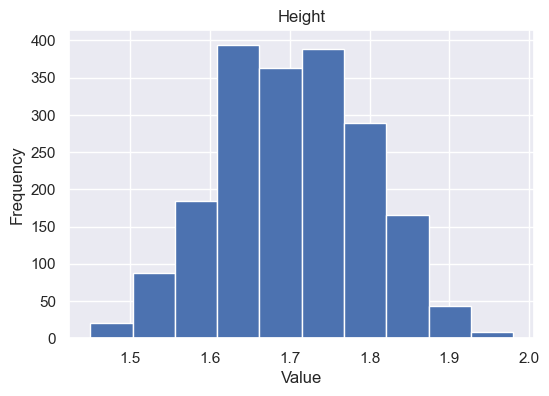

__________________________________________________
Weight
__________________________________________________


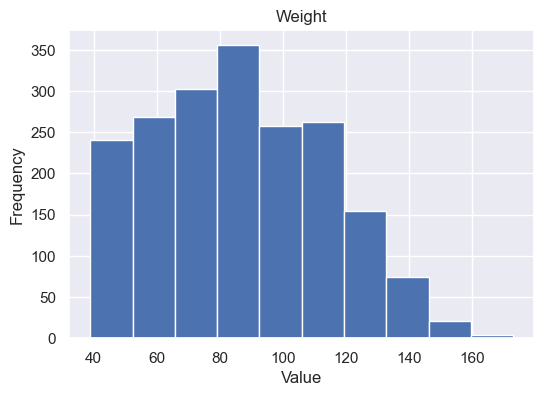

__________________________________________________
FCVC
__________________________________________________


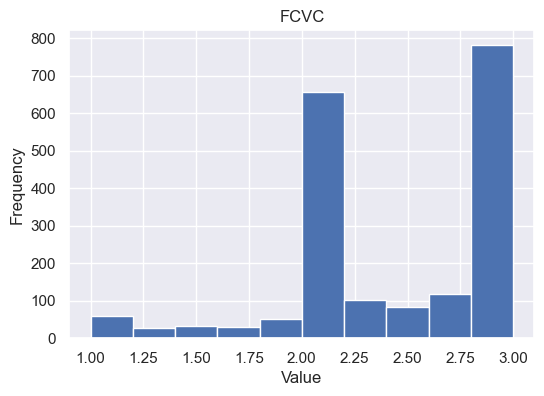

__________________________________________________
NCP
__________________________________________________


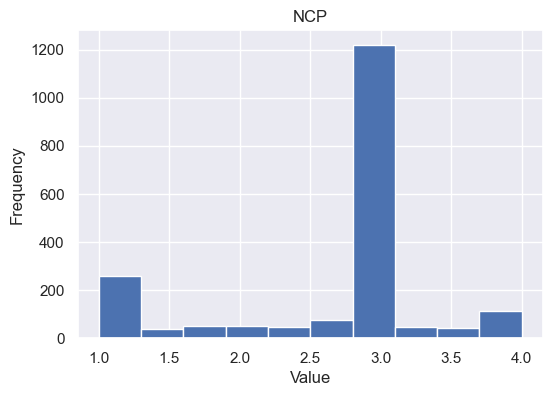

In [27]:
# Get all numeric columns in the dataframe
numeric_columns = df.select_dtypes(include='number').columns

# Choose the first five numeric columns (you can modify this as per your requirement)
five_columns = numeric_columns[1:5]

# Iterate over each of the selected columns and plot a histogram
for column in five_columns:
    print('__________________________________________________')
    print(column)
    print('__________________________________________________')
    sns.set(rc={'figure.figsize':(6,4)})
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[column], bins=10)  # Plot the histogram with 10 bins
    plt.title(column)  # Set the title of the histogram as the column name
    plt.xlabel('Value')  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Display the histogram

In [28]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

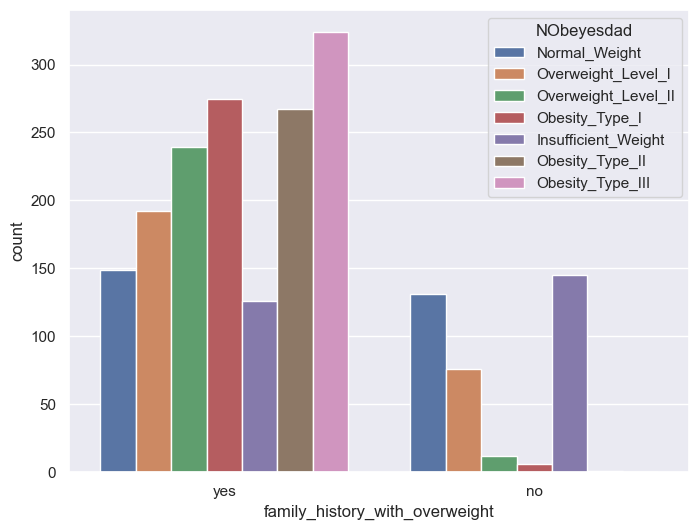

In [29]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(x='family_history_with_overweight', hue="NObeyesdad", data=df)
plt.show()

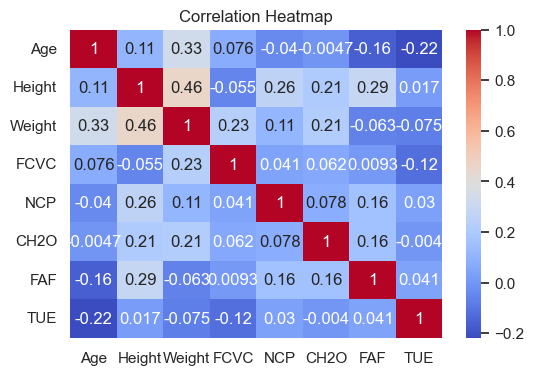

In [30]:
# Plot correlation heatmap
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Correlation Heatmap')
plt.show()

# **Data preprocessing**

In [31]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [32]:
# check null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [33]:
# import The Labelencoder
from sklearn.preprocessing import LabelEncoder

In [34]:
# Initialize LabelEncoder
lb = LabelEncoder()

# Get columns with object (categorical) data
label = df.select_dtypes(include=[object]).columns.to_list()

# Encode categorical columns with LabelEncoder
for i in label:
    df[i] = lb.fit_transform(df[i])
    # Transform column 'i' from categorical to numerical representation

In [35]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6

In [36]:
# check The null value once
df.isnull().sum().sum()

0

In [37]:
x =  df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [38]:
y.value_counts()

NObeyesdad
4    324
2    281
1    280
0    271
5    268
3    268
6    251
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
x_train.shape

(1360, 16)

In [41]:
x_test.shape

(583, 16)

# **Moduel Train**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## **LogisticRegression**

$$Before Hyperparametertuning$$

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

# Assuming x_train, y_train, x_test, y_test are already defined

# Train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
recall = recall_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
f1 = f1_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"],
]

print("Logistic Regression Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))


Logistic Regression Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.6947 |
+-----------+---------+
| Precision |  0.6954 |
+-----------+---------+
| Recall    |  0.6947 |
+-----------+---------+
| F1 Score  |  0.6925 |
+-----------+---------+


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

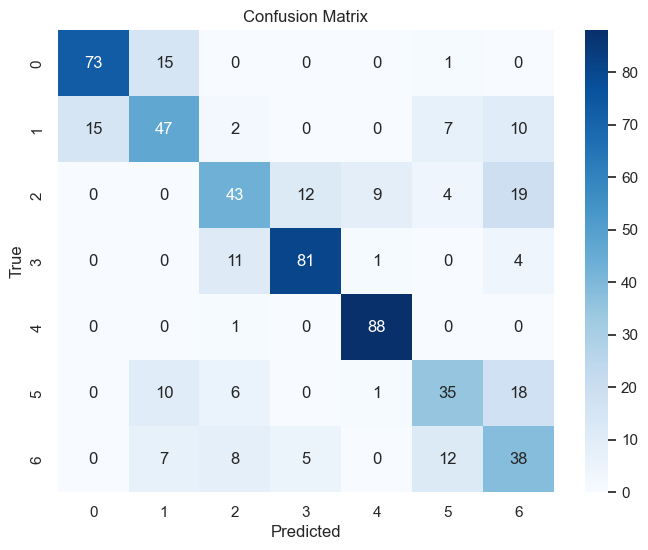

In [45]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

$$ Hyper Parametet Tuning$$

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

# Assuming x_train, y_train, x_test, y_test are already defined

# Define Logistic Regression model
logistic_regression_model = LogisticRegression()

# Define hyperparameters for tuning
param_grid = {'penalty': ['l2'],  # lbfgs solver supports only 'l2' penalty
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create GridSearchCV object
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')

# Train the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_logistic_regression_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logistic_regression_model.predict(x_test)

# Calculate evaluation metrics
accuracy_lr_best = accuracy_score(y_test, y_pred)
precision_lr_best = precision_score(y_test, y_pred, average='weighted')
recall_lr_best = recall_score(y_test, y_pred, average='weighted')
f1_lr_best = f1_score(y_test, y_pred, average='weighted')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_lr_best:.4f}"],
    ["Precision", f"{precision_lr_best:.4f}"],
    ["Recall", f"{recall_lr_best:.4f}"],
    ["F1 Score", f"{f1_lr_best:.4f}"],
]

print("Logistic Regression Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))
print("Best hyperparameters:", grid_search.best_params_)


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

Logistic Regression Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.6655 |
+-----------+---------+
| Precision |  0.6563 |
+-----------+---------+
| Recall    |  0.6655 |
+-----------+---------+
| F1 Score  |  0.6589 |
+-----------+---------+
Best hyperparameters: {'C': 1000, 'penalty': 'l2'}


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future ver

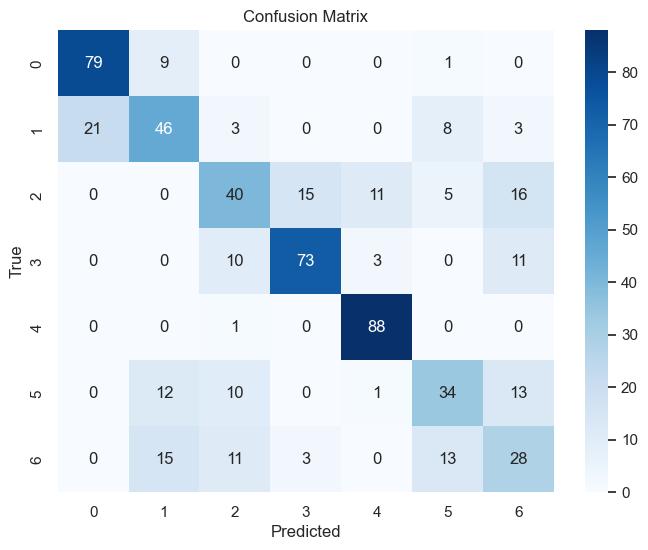

In [47]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **DecisionTreeClassifier**

$$Before Hyperparametertuning$$

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

# Assuming x_train, y_train, x_test, y_test are already defined

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(x_test)

# Calculate evaluation metrics
accuracy_de = accuracy_score(y_test, y_pred)
precision_de = precision_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
recall_de = recall_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
f1_de = f1_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_de:.4f}"],
    ["Precision", f"{precision_de:.4f}"],
    ["Recall", f"{recall_de:.4f}"],
    ["F1 Score", f"{f1_de:.4f}"],
]

print("Decision Tree Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))

Decision Tree Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9588 |
+-----------+---------+
| Precision |  0.9591 |
+-----------+---------+
| Recall    |  0.9588 |
+-----------+---------+
| F1 Score  |  0.9588 |
+-----------+---------+


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

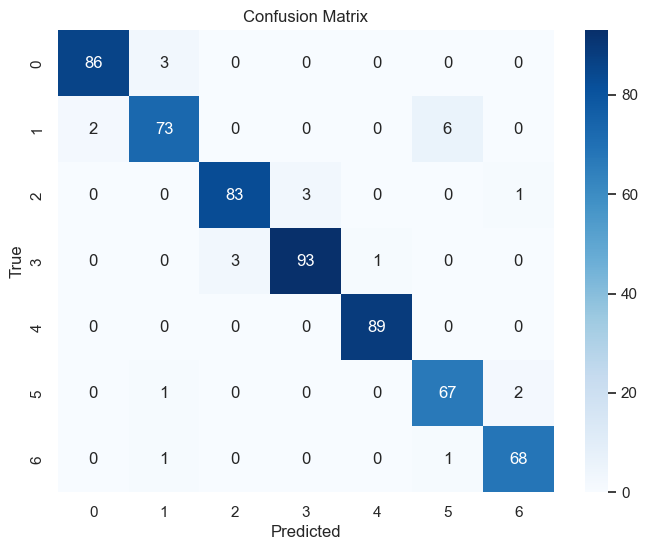

In [49]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

$$Hyperparametertuning$$

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

# Assuming x_train, y_train, x_test, y_test are already defined

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and use them to create the final model
best_params = grid_search.best_params_
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(x_test)

# Calculate evaluation metrics
accuracy_de_best = accuracy_score(y_test, y_pred)
precision_de_best = precision_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
recall_de_best = recall_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
f1_de_best = f1_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_de_best:.4f}"],
    ["Precision", f"{precision_de_best:.4f}"],
    ["Recall", f"{recall_de_best:.4f}"],
    ["F1 Score", f"{f1_de_best:.4f}"],
]

print("Decision Tree Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))
print("Best Hyperparameters:", best_params)

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

Decision Tree Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.964  |
+-----------+---------+
| Precision |  0.9649 |
+-----------+---------+
| Recall    |  0.964  |
+-----------+---------+
| F1 Score  |  0.964  |
+-----------+---------+
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

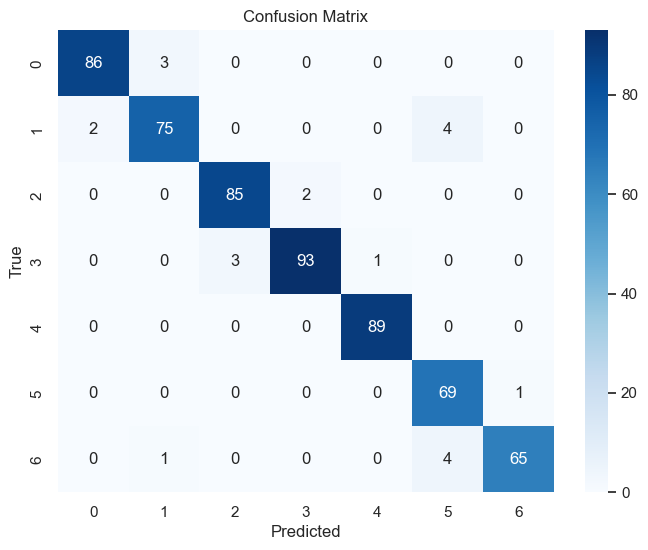

In [51]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **RandomForestClassifier**

$$BeforeHyperparametertuning$$

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

# Assuming x_train, y_train, x_test, y_test are already defined

# Train the RandomForestClassifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(x_test)

# Calculate evaluation metrics
accuracy_ra = accuracy_score(y_test, y_pred)
precision_ra = precision_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
recall_ra = recall_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
f1_ra = f1_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_ra:.4f}"],
    ["Precision", f"{precision_ra:.4f}"],
    ["Recall", f"{recall_ra:.4f}"],
    ["F1 Score", f"{f1_ra:.4f}"],
]

print("Random Forest Classifier Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Random Forest Classifier Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9605 |
+-----------+---------+
| Precision |  0.964  |
+-----------+---------+
| Recall    |  0.9605 |
+-----------+---------+
| F1 Score  |  0.9612 |
+-----------+---------+


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


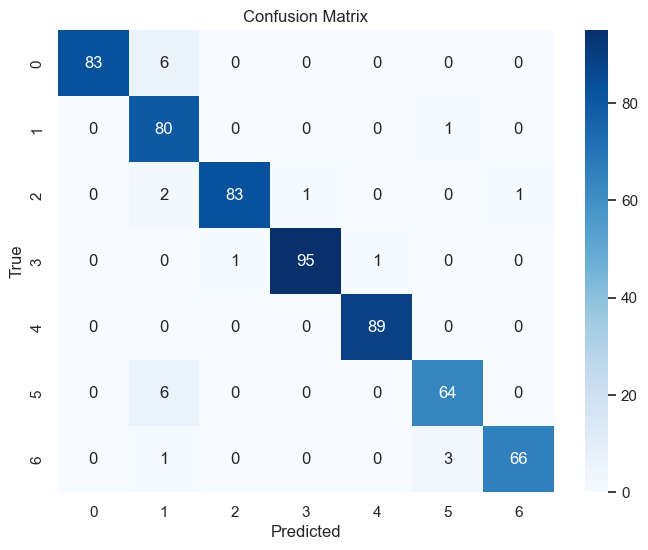

In [53]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

$$Hyperparametertuning$$

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

# Assuming x_train, y_train, x_test, y_test are already defined

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomForestClassifier
random_forest_model = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
accuracy_ra_best = accuracy_score(y_test, y_pred)
precision_ra_best = precision_score(y_test, y_pred, average='weighted')
recall_ra_best = recall_score(y_test, y_pred, average='weighted')
f1_ra_best = f1_score(y_test, y_pred, average='weighted')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_ra_best:.4f}"],
    ["Precision", f"{precision_ra_best:.4f}"],
    ["Recall", f"{recall_ra_best:.4f}"],
    ["F1 Score", f"{f1_ra_best:.4f}"],
]

print("Random Forest Classifier Metrics:")
print("Best Hyperparameters:", best_params)
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

Random Forest Classifier Metrics:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9554 |
+-----------+---------+
| Precision |  0.9579 |
+-----------+---------+
| Recall    |  0.9554 |
+-----------+---------+
| F1 Score  |  0.956  |
+-----------+---------+


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


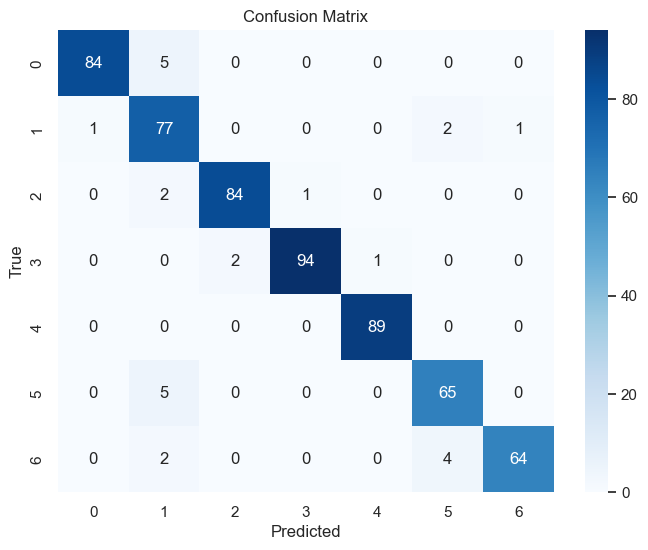

In [55]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **ExtraTreesClassifier**

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

# Assuming x_train, y_train, x_test, y_test are already defined

# Train the Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = extra_trees_model.predict(x_test)

# Calculate evaluation metrics
accuracy_ex = accuracy_score(y_test, y_pred)
precision_ex = precision_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
recall_ex = recall_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
f1_ex = f1_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_ex:.4f}"],
    ["Precision", f"{precision_ex:.4f}"],
    ["Recall", f"{recall_ex:.4f}"],
    ["F1 Score", f"{f1_ex:.4f}"],
]

print("Extra Trees Classifier Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Extra Trees Classifier Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9485 |
+-----------+---------+
| Precision |  0.9507 |
+-----------+---------+
| Recall    |  0.9485 |
+-----------+---------+
| F1 Score  |  0.9492 |
+-----------+---------+


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


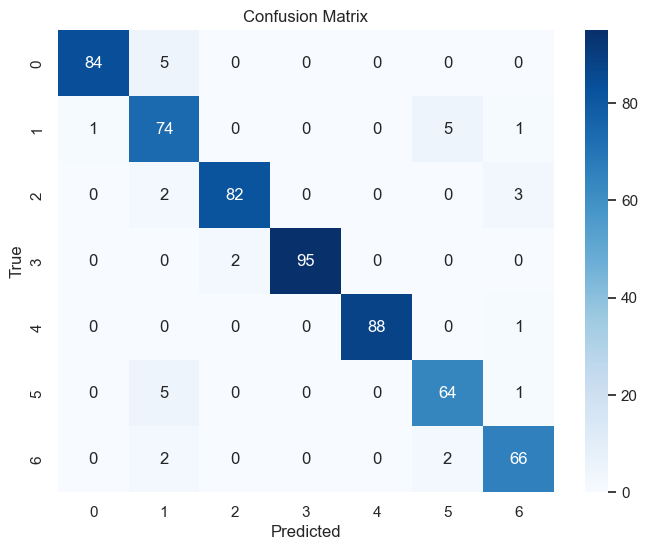

In [57]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

$$Hyperparametertuning$$

In [58]:
from sklearn.model_selection import GridSearchCV

# Assuming x_train, y_train, x_test, y_test are already defined

# Define the parameter grid for Extra Trees Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create an Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(extra_trees_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(x_test)

# Calculate evaluation metrics
accuracy_ex_best = accuracy_score(y_test, y_pred)
precision_ex_best = precision_score(y_test, y_pred, average='weighted')
recall_ex_best = recall_score(y_test, y_pred, average='weighted')
f1_ex_best = f1_score(y_test, y_pred, average='weighted')

# Display the best parameters
print("Best Hyperparameters:")
print(best_params)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_ex_best:.4f}"],
    ["Precision", f"{precision_ex_best:.4f}"],
    ["Recall", f"{recall_ex_best:.4f}"],
    ["F1 Score", f"{f1_ex_best:.4f}"],
]

print("Extra Trees Classifier Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

Best Hyperparameters:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Extra Trees Classifier Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9485 |
+-----------+---------+
| Precision |  0.951  |
+-----------+---------+
| Recall    |  0.9485 |
+-----------+---------+
| F1 Score  |  0.9493 |
+-----------+---------+


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


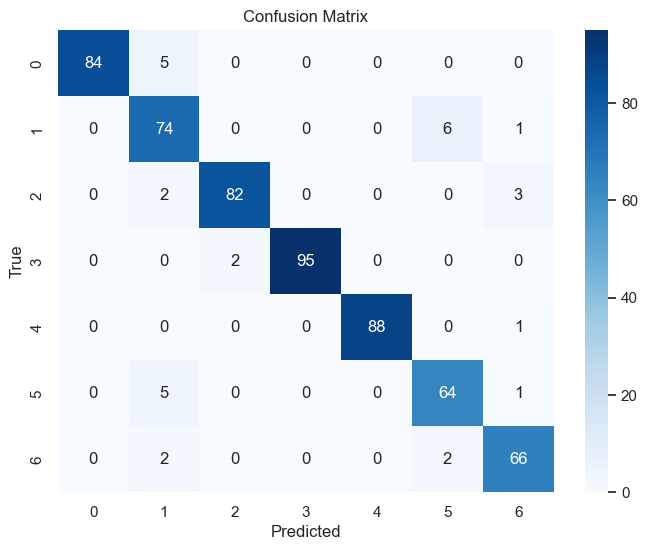

In [59]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **AdaBoostClassifier**

$$BehoreHyperparametertuning$$

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate


# Train the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(n_estimators=1000, random_state=0)
adaboost_model.fit(x_train, y_train)

# Make predictions on the test set
a_pred = adaboost_model.predict(x_test)

# Calculate evaluation metrics
accuracy_ad = accuracy_score(y_test, y_pred)
precision_ad = precision_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
recall_ad = recall_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference
f1_ad = f1_score(y_test, y_pred, average='weighted')  # Choose 'micro', 'macro', 'weighted' based on your preference

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results in a tabular format
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_ad:.4f}"],
    ["Precision", f"{precision_ad:.4f}"],
    ["Recall", f"{recall_ad:.4f}"],
    ["F1 Score", f"{f1_ad:.4f}"],
]
# Print the results in a tabular format
print("AdaBoostClassifier Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

AdaBoostClassifier Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9485 |
+-----------+---------+
| Precision |  0.951  |
+-----------+---------+
| Recall    |  0.9485 |
+-----------+---------+
| F1 Score  |  0.9493 |
+-----------+---------+


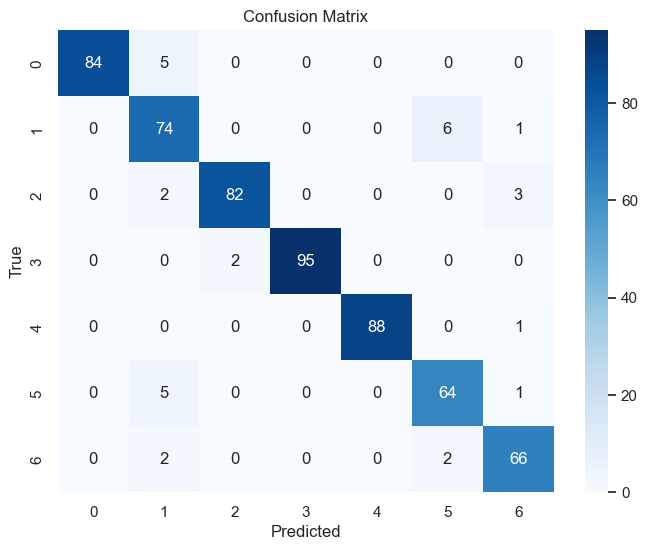

In [61]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

$$Hyperparametertuning$$

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 500, 1000],  # You can add more values to search
    'learning_rate': [0.01, 0.1, 0.5, 1.0]  # You can add more values to search
}

# Create AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=0)

# Create GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the AdaBoostClassifier model with the best parameters
best_adaboost_model = AdaBoostClassifier(random_state=0, **best_params)
best_adaboost_model.fit(x_train, y_train)

# Make predictions on the test set using the best model
best_a_pred = best_adaboost_model.predict(x_test)

# Calculate evaluation metrics using the best model
accuracy_best_ad = accuracy_score(y_test, y_pred)
precision_best_ad = precision_score(y_test, y_pred, average='weighted')
recall_best_ad = recall_score(y_test, y_pred, average='weighted')
f1_best_ad = f1_score(y_test, y_pred, average='weighted')

# Display the best parameters and results
print("Best Parameters:", best_params)
result_table = [
    ["Metric", "Score"],
    ["Accuracy", f"{accuracy_best_ad:.4f}"],
    ["Precision", f"{precision_best_ad:.4f}"],
    ["Recall", f"{recall_best_ad:.4f}"],
    ["F1 Score", f"{f1_best_ad:.4f}"],
]
print("Best AdaBoostClassifier Metrics:")
print(tabulate(result_table, headers="firstrow", tablefmt="grid"))


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 1000}
Best AdaBoostClassifier Metrics:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Accuracy  |  0.9485 |
+-----------+---------+
| Precision |  0.951  |
+-----------+---------+
| Recall    |  0.9485 |
+-----------+---------+
| F1 Score  |  0.9493 |
+-----------+---------+


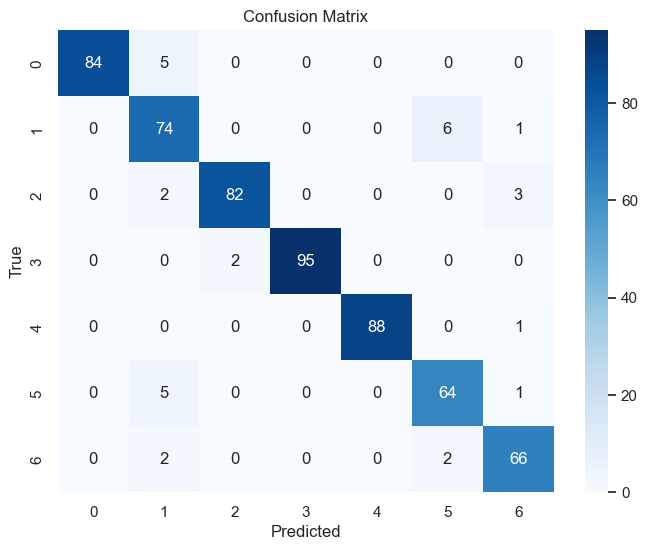

In [63]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **LSTM**

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X_train, y_train, X_test, y_test defined

# Reshape the data
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Initialize the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Summarize the model
model.summary()

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions and evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate accuracy and classification report
lstm_acc = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

msg = 'The accuracy obtained by LSTM is {:.2%}'.format(lstm_acc)
print(msg)
# Display the classification report
print("Classification Report:\n", classification_rep)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 16, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 16, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 16, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
msg = 'The accuracy obtained by LSTM is {:.2%}'.format(lstm_acc)

In [66]:
msg

'The accuracy obtained by LSTM is 13.89%'

## **ANN**

In [67]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
Dense(units=16, activation='relu'),
Dense(units=24, activation='relu'),
Dropout(0.5),
Dense(units=20, activation='relu'),
Dense(units=24, activation='relu'),
Dense(units=1, activation='sigmoid'), ])

model.compile(optimizer='adam',
loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=10)
loss, accuracy_ann = model.evaluate(x_test, y_test)
msg = 'The accuracy obtained by ANN is ' + str(accuracy_ann) + str('%')

Epoch 1/10


C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


91/91 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 2/10
91/91 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 3/10
91/91 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 4/10
91/91 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 5/10
91/91 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 6/10
91/91 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 7/10
91/91 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 8/10
91/91 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 9/10
91/91 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1463
Epoch 10/10
19/19 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accurac

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


In [68]:
print(msg)

The accuracy obtained by ANN is 0.13893653452396393%


## **Comparison Graph on befor Hyperparameter Tuning**

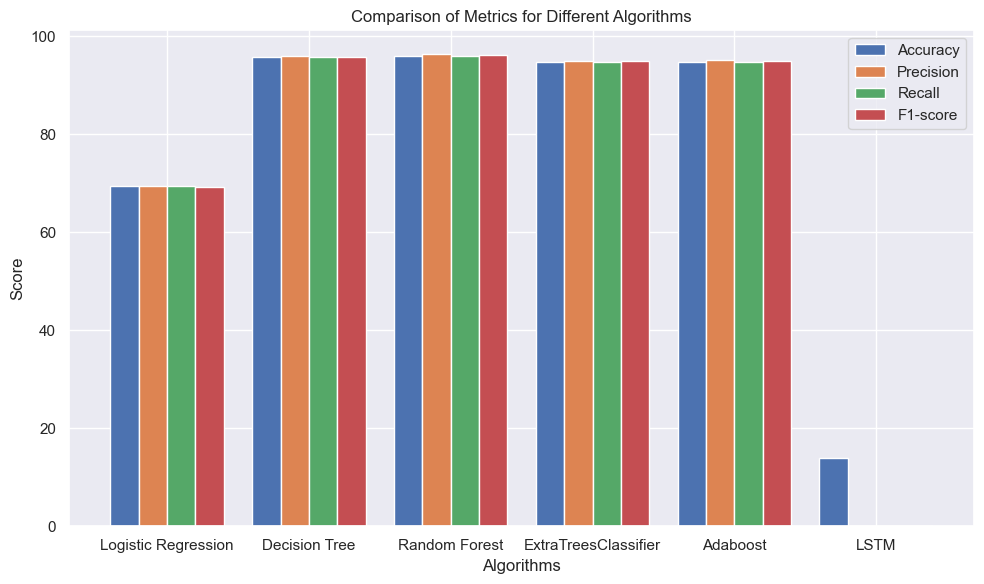

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming acc_dtc, acc_rfc, ..., f1_cnn are defined and populated with appropriate values

# Lists to store the metrics for each algorithm
algorithms = ['Logistic Regression','Decision Tree', 'Random Forest', 'ExtraTreesClassifier', 'Adaboost', 'LSTM']
accuracies = [accuracy*100, accuracy_de*100, accuracy_ra*100, accuracy_ex*100, accuracy_ad*100, lstm_acc*100]
precisions = [precision*100, precision_de*100, precision_ra*100, precision_ex*100, precision_ad*100,0]
recalls = [recall*100, recall_de*100, recall_ra*100, recall_ex*100, recall_ad*100,0]
f1_scores = [f1*100, f1_de*100, f1_ra*100, f1_ex*100, f1_ad*100,0]

# Set the width of the bars
bar_width = 0.2

# Create an array of indices for the x-axis
x = np.arange(len(algorithms))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
ax.bar(x - 1.5 * bar_width, accuracies, bar_width, label='Accuracy', align='center')
ax.bar(x - 0.5 * bar_width, precisions, bar_width, label='Precision', align='center')
ax.bar(x + 0.5 * bar_width, recalls, bar_width, label='Recall', align='center')
ax.bar(x + 1.5 * bar_width, f1_scores, bar_width, label='F1-score', align='center')

# Set the x-axis labels and the title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics for Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## **Comparison Graph on After Hyperparameter Tuning**

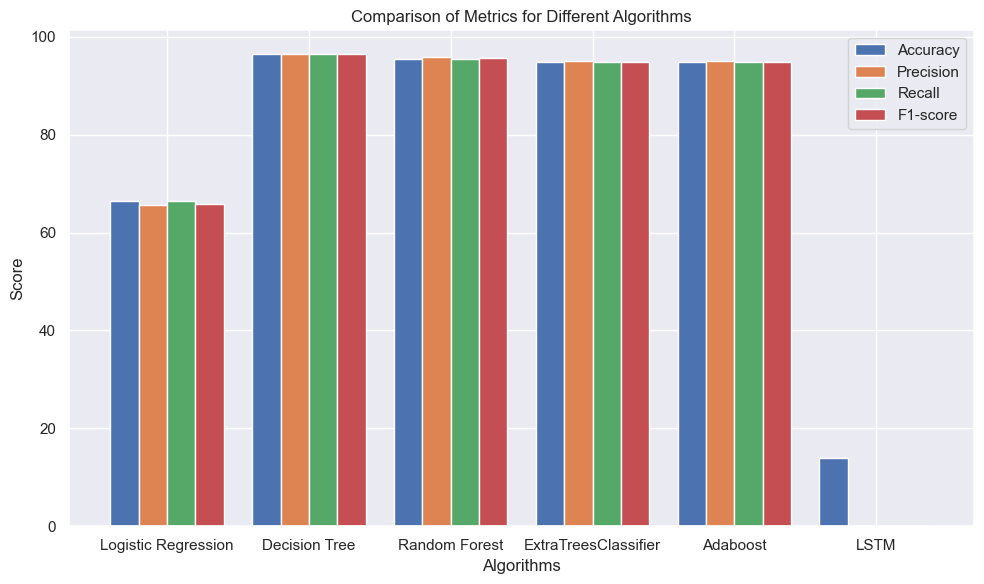

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming acc_dtc, acc_rfc, ..., f1_cnn are defined and populated with appropriate values

# Lists to store the metrics for each algorithm
algorithms = ['Logistic Regression','Decision Tree', 'Random Forest', 'ExtraTreesClassifier', 'Adaboost', 'LSTM']
accuracies = [accuracy_lr_best*100, accuracy_de_best*100, accuracy_ra_best*100, accuracy_ex_best*100, accuracy_best_ad*100, lstm_acc*100]
precisions = [precision_lr_best*100, precision_de_best*100, precision_ra_best*100, precision_ex_best*100, precision_best_ad*100,0]
recalls = [recall_lr_best*100, recall_de_best*100, recall_ra_best*100, recall_ex_best*100, recall_best_ad*100,0]
f1_scores = [f1_lr_best*100, f1_de_best*100, f1_ra_best*100, f1_ex_best*100, f1_best_ad*100,0]

# Set the width of the bars
bar_width = 0.2

# Create an array of indices for the x-axis
x = np.arange(len(algorithms))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
ax.bar(x - 1.5 * bar_width, accuracies, bar_width, label='Accuracy', align='center')
ax.bar(x - 0.5 * bar_width, precisions, bar_width, label='Precision', align='center')
ax.bar(x + 0.5 * bar_width, recalls, bar_width, label='Recall', align='center')
ax.bar(x + 1.5 * bar_width, f1_scores, bar_width, label='F1-score', align='center')

# Set the x-axis labels and the title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics for Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# **Prediction**

In [71]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6

In [72]:
inp = [0,	21.0,	1.62,	64.0,	1,	0,	2.0,	3.0,	2,	0,	2.0,	0,	0.0,	1.0,	3,	3	]

In [73]:
from sklearn.ensemble import AdaBoostClassifier


# Train the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train, y_train)

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


AdaBoostClassifier()

In [74]:
pred = adaboost_model.predict([inp])

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [75]:
pred

array([1])

In [76]:
if pred == 0: msg="Insufitient Weight"
elif pred ==1: msg="Normal Weight"
elif pred==2: msg="Obesity Type - 1"
elif pred==3: msg="Obesity Type - 2"
elif pred==4: msg="Obesity Type - 3"
elif pred==5: msg='OverWeight Level-1'
else:msg="OverWeight Level - 2"
print(msg)

Normal Weight


In [77]:
inp1 = [1,	22.0,	1.78,	89.8,	0,	0,	2.0,	1.0,	2,	0	,2.0,	0,	0.0,	0.0,	2,	3	]

In [78]:
pred = adaboost_model.predict([inp1])

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [79]:
pred

array([6])

In [80]:
if pred == 0: msg="Insufitient Weight"
elif pred ==1: msg="Normal Weight"
elif pred==2: msg="Obesity Type - 1"
elif pred==3: msg="Obesity Type - 2"
elif pred==4: msg="Obesity Type - 3"
elif pred==5: msg='OverWeight Level-1'
else:msg="OverWeight Level - 2"
print(msg)

OverWeight Level - 2


# **-------------------END-------------------**